##### Project Description:
The 10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. Each class contains 6,000 images.The training set contains 50,000 images, while the test sets provides 10,000 images. For More Information Visit the link https://www.cs.toronto.edu/~kriz/cifar.html  .

##### Goal:
The aim of the project is to identify the class. 
<font color='blue'> The solution that is provided below can also be applied to CIFAR 100 dataset. Some HyperParameters Tuning may be required to obtain accuracy</font><br/>
<font color='red'>Caution:For CIFAR 100 DataSet we may need higher hardware</font>

Software Requirements:
* Tensorflow 1.0.0 or higher
* Keras 2.0.2 or higher
* Matplotlib 1.5.3 or higher
* Scikit-Learn 0.18.1 or higher
* Numpy 1.12.1 or higher

Hardware Requirements:
* Either 32 or 64 bit architecture, 2+ GHz CPU
* 4GB RAM

###### Many TextBooks and WebSites imports all the python library at the beginning.But we are using python's dynamic capabilities

##### Step-1:- (Get the Data)

In [1]:
## the dataset for cifar10 is already available in keras
import keras.datasets
#from keras.datasets import cifar10 
#developers can use import the library using this notiation also 'from keras.datasets import cifar10'
#but jupyter notebook and most of the Editors/IDE's will be able to provide Intellisense/Code completion if we use the 
# notation of importing the library 'import keras.datasets' and is readable.

Using TensorFlow backend.


Here i am using google tensorflow as  a backend . Keras supports Theno and CNTK . 
But i feel the below code will not change if we use Keras.<br/> Thanks to keras for this high level abastract api.As per the documentation, the dataset has 3 channels . It means 32X32 pixels (32 rows x 32 columns)

List of datasets that are available in keras can be found at this url https://keras.io/datasets/

In [2]:
IMG_CHANNELS=3
IMG_ROWS=32
IMG_COLS = 32

Define Some HyperParameters. 

In [36]:
## No of classes as per cifar-10 there are 10 classes
NO_CLASSES = 10  #for cifar-100 it is 100

Load Dataset( By Downloading) The below function will automatically download the data.<br/>
<font color='red'>Note: If the dataset is already downloaded No need to run this step again</font><br/>
The dataset is aroung 150+ MB .So it will take a while to download the data

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

<font color='blue'>For CIFAR 100 use the code keras.datasets.cifar100</font>

In [5]:
#just print the current working directory
import os
cwd = os.getcwd()
print(cwd)

D:\MyGitHub\deeplearningwork


<font color="red">For me it took around 10-15 minutes to download the data set</font><br/>
In the above the variable X_train denotes train samples<br/>
In the above the variable X_test denotes test samples


** The shape of the samples are as below **

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


** In the above first value is number of records **

##### Step-2:- (Encode the Data)

Do one hot encoding to normalize the images

In [7]:
import keras.utils
#from keras.utils import np_utils

In [8]:
y_train = keras.utils.np_utils.to_categorical(y_train, NO_CLASSES)
y_test = keras.utils.np_utils.to_categorical(y_test, NO_CLASSES)

In [9]:
# Convert to float and perform normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

*** Set Hyper parameters (Below are Hyper Parameters) ***

In [10]:
BATCH_SIZE = 128
NO_EPOCHS = 20 ## No Of Epochs
VERBOSE = 1  ## we wanted to see the output
VALIDATION_SPLIT = 0.2 

##### Step-3:- (Creating Neural Network)

Create NeuralNetwork with 32 convolutional filters, each of which with a 3 x 3 size. 
The output dimension is the same one of the input shape, so it will be 32 x 32 and activation is ReLU, A simple way
of introducing non-linearity.<br/>
After that we have a max-pooling operation with pool size 2 x 2 and a dropout at 25%:

In [11]:
import keras.models

In [12]:
model = keras.models.Sequential()

In [13]:
import keras.layers.convolutional

In [14]:
model.add(keras.layers.convolutional.Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))

In [15]:
import keras.layers.core

In [16]:
model.add(keras.layers.Activation('relu'))

In [17]:
model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))

In [18]:
model.add(keras.layers.core.Dropout(0.25))

The next stage in the deep pipeline is a dense network with 512 units and ReLU activation followed
by a dropout at 50% and by a softmax layer with 10 classes as output, one for each category:

In [19]:
model.add(keras.layers.core.Flatten())

In [20]:
model.add(keras.layers.core.Dense(512))

In [21]:
model.add(keras.layers.core.Activation('relu'))

In [22]:
model.add(keras.layers.core.Dropout(0.5))

In [23]:
model.add(keras.layers.core.Dense(NO_CLASSES))

In [24]:
model.add(keras.layers.core.Activation('softmax'))

##### print the summary of the model  to see how it looks like

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

##### Step-4:- (Train Neural Network OR Model)

Split the data and compute a validation set in addition to the training and testing sets. The training is used to build our models, the validation is used to select the best performing approach, while the test set is to check the
performance of our best models on fresh unseen data.

*** Set <font color='blue'>optimizer</font> Hyper parameter***

In [26]:
import keras.optimizers

In [27]:
OPTIM = keras.optimizers.RMSprop()

In [28]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,metrics=['accuracy'])

*** Set <font color='blue'>NO Of Epochs</font> Hyper parameter***

In [29]:
NO_OF_EPOCHS = 10 #20

In [30]:
modelhistory = model.fit(x_train, y_train, batch_size=BATCH_SIZE,epochs=NO_OF_EPOCHS,validation_split=VALIDATION_SPLIT,verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 121s 3ms/step - loss: 1.7062 - acc: 0.3928 - val_loss: 1.3952 - val_acc: 0.5193

#### <font color='red'> System got hanged if i use 20 epochs and batch size 128. It seems Jupyter notebook is having trouble in google chrome. so switched to Edge Browser
</font>

Evaluate the Model

In [31]:
score = model.evaluate(x_test, y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)

10000/10000 [==============================] - 7s 713us/step

In [32]:
print("Test score:", score[0])
print('Test accuracy:', score[1])

Test score: 0.995719291782
Test accuracy: 0.6552


##### Step-5:- (Save the Model)

In [33]:
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
#And the weights learned by our deep network on the training set
model.save_weights('cifar10_weights.h5', overwrite=True)

##### Step-6:- (Plot the graph)

In [34]:
import matplotlib.pyplot as plt

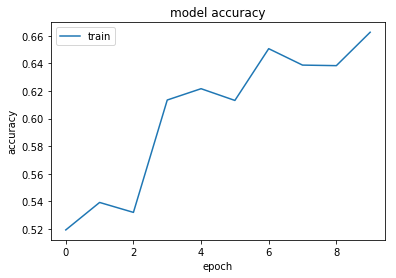

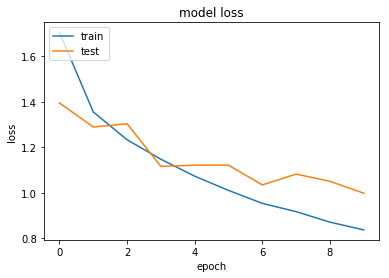

In [35]:
plt.plot(modelhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


##### Step-7:- (Next Steps Improving the performance)

* Add a Deeper Network
    * conv+conv+maxpool+dropout+conv+conv+maxpool Followed by a standard dense+dropout+dense
* Use Data Augmentation
* Adding more examples
* Generate more image GAN's and train the Neural Network